**Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score
from sklearn.metrics import classification_report

from imblearn.over_sampling import RandomOverSampler 
from imblearn.under_sampling import RandomUnderSampler

from collections import Counter

plt.style.use('fivethirtyeight') #This style is designed to provide a clean and distinctive look to plots

import warnings
warnings.filterwarnings("ignore")

**Load The Dataset**

In [2]:
df_train = pd.read_csv("Train_data.csv")
df_test = pd.read_csv("test_data.csv")

In [3]:
df_train.head(10)

,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,...,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein,Disease
0,0.739597,0.650198,0.713631,0.868491,0.687433,0.529895,0.290006,0.631045,0.001328,0.795829,...,0.502665,0.215560,0.512941,0.064187,0.610827,0.939485,0.095512,0.465957,0.769230,Healthy
1,0.121786,0.023058,0.944893,0.905372,0.507711,0.403033,0.164216,0.307553,0.207938,0.505562,...,0.856810,0.652465,0.106961,0.942549,0.344261,0.666368,0.659060,0.816982,0.401166,Diabetes
2,0.452539,0.116135,0.544560,0.400640,0.294538,0.382021,0.625267,0.295122,0.868369,0.026808,...,0.466795,0.387332,0.421763,0.007186,0.506918,0.431704,0.417295,0.799074,0.779208,Thalasse
3,0.136609,0.015605,0.419957,0.191487,0.081168,0.166214,0.073293,0.668719,0.125447,0.501051,...,0.016256,0.040137,0.826721,0.265415,0.594148,0.225756,0.490349,0.637061,0.354094,Anemia
4,0.176737,0.752220,0.971779,0.785286,0.443880,0.439851,0.894991,0.442159,0.257288,0.805987,...,0.429431,0.146294,0.221574,0.015280,0.567115,0.841412,0.153350,0.794008,0.094970,Thalasse
5,0.898222,0.258706,0.933307,0.353082,0.373952,0.297138,0.900010,0.985488,0.679007,0.355774,...,0.389461,0.529914,0.222687,0.772461,0.119994,0.894273,0.128124,0.379016,0.751438,Diabetes
6,0.353734,0.757757,0.755007,0.012594,0.227684,0.425117,0.387461,0.461418,0.305588,0.741120,...,0.446854,0.729376,0.615543,0.794735,0.233890,0.612188,0.407891,0.426863,0.532100,Thromboc
7,0.399017,0.508254,0.777394,0.096310,0.925520,0.652505,0.684896,0.380656,0.248189,0.490245,...,0.673188,0.033037,0.772045,0.253892,0.322486,0.659069,0.774219,0.714177,0.609177,Thromboc
8,0.722428,0.300282,0.487907,0.200865,0.402035,0.729285,0.851338,0.820546,0.106637,0.006947,...,0.022621,0.061317,0.644191,0.715823,0.417170,0.639148,0.213026,0.549920,0.036800,Thalasse
9,0.399017,0.508254,0.777394,0.096310,0.925520,0.652505,0.684896,0.380656,0.248189,0.490245,...,0.673188,0.033037,0.772045,0.253892,0.322486,0.659069,0.774219,0.714177,0.609177,Thromboc


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2351 entries, 0 to 2350
Data columns (total 25 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Glucose                                    2351 non-null   float64
 1   Cholesterol                                2351 non-null   float64
 2   Hemoglobin                                 2351 non-null   float64
 3   Platelets                                  2351 non-null   float64
 4   White Blood Cells                          2351 non-null   float64
 5   Red Blood Cells                            2351 non-null   float64
 6   Hematocrit                                 2351 non-null   float64
 7   Mean Corpuscular Volume                    2351 non-null   float64
 8   Mean Corpuscular Hemoglobin                2351 non-null   float64
 9   Mean Corpuscular Hemoglobin Concentration  2351 non-null   float64
 10  Insulin                 

In [5]:
df = pd.concat([df_train, df_test], ignore_index=True)

In [6]:
print(df.isnull().sum())

Glucose                                      0
Cholesterol                                  0
Hemoglobin                                   0
Platelets                                    0
White Blood Cells                            0
Red Blood Cells                              0
Hematocrit                                   0
Mean Corpuscular Volume                      0
Mean Corpuscular Hemoglobin                  0
Mean Corpuscular Hemoglobin Concentration    0
Insulin                                      0
BMI                                          0
Systolic Blood Pressure                      0
Diastolic Blood Pressure                     0
Triglycerides                                0
HbA1c                                        0
LDL Cholesterol                              0
HDL Cholesterol                              0
ALT                                          0
AST                                          0
Heart Rate                                   0
Creatinine   

In [7]:
df.shape

(2837, 25)

In [8]:
X = df.drop(columns=['Disease'])
y = df['Disease']

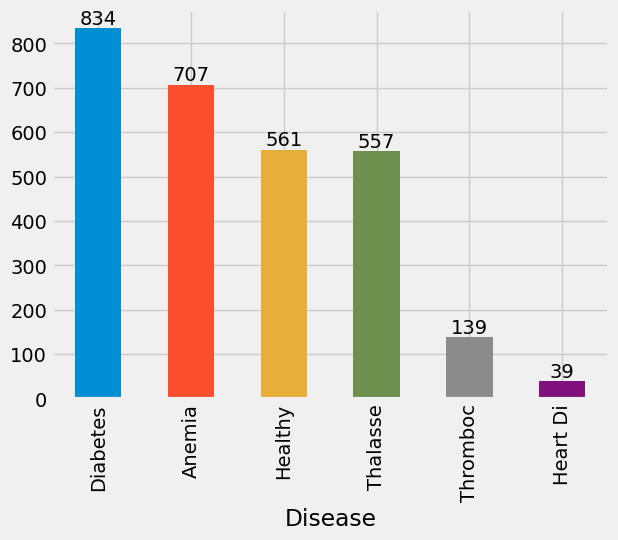

In [9]:
counts = df[df.columns[-1]].value_counts()
palette = sns.color_palette()
fig, axes = plt.subplots()
counts.plot(kind="bar", ax=axes, color=palette)
for container in axes.containers:
    axes.bar_label(container)
plt.show()

In [10]:
df_encoded = pd.get_dummies(df)

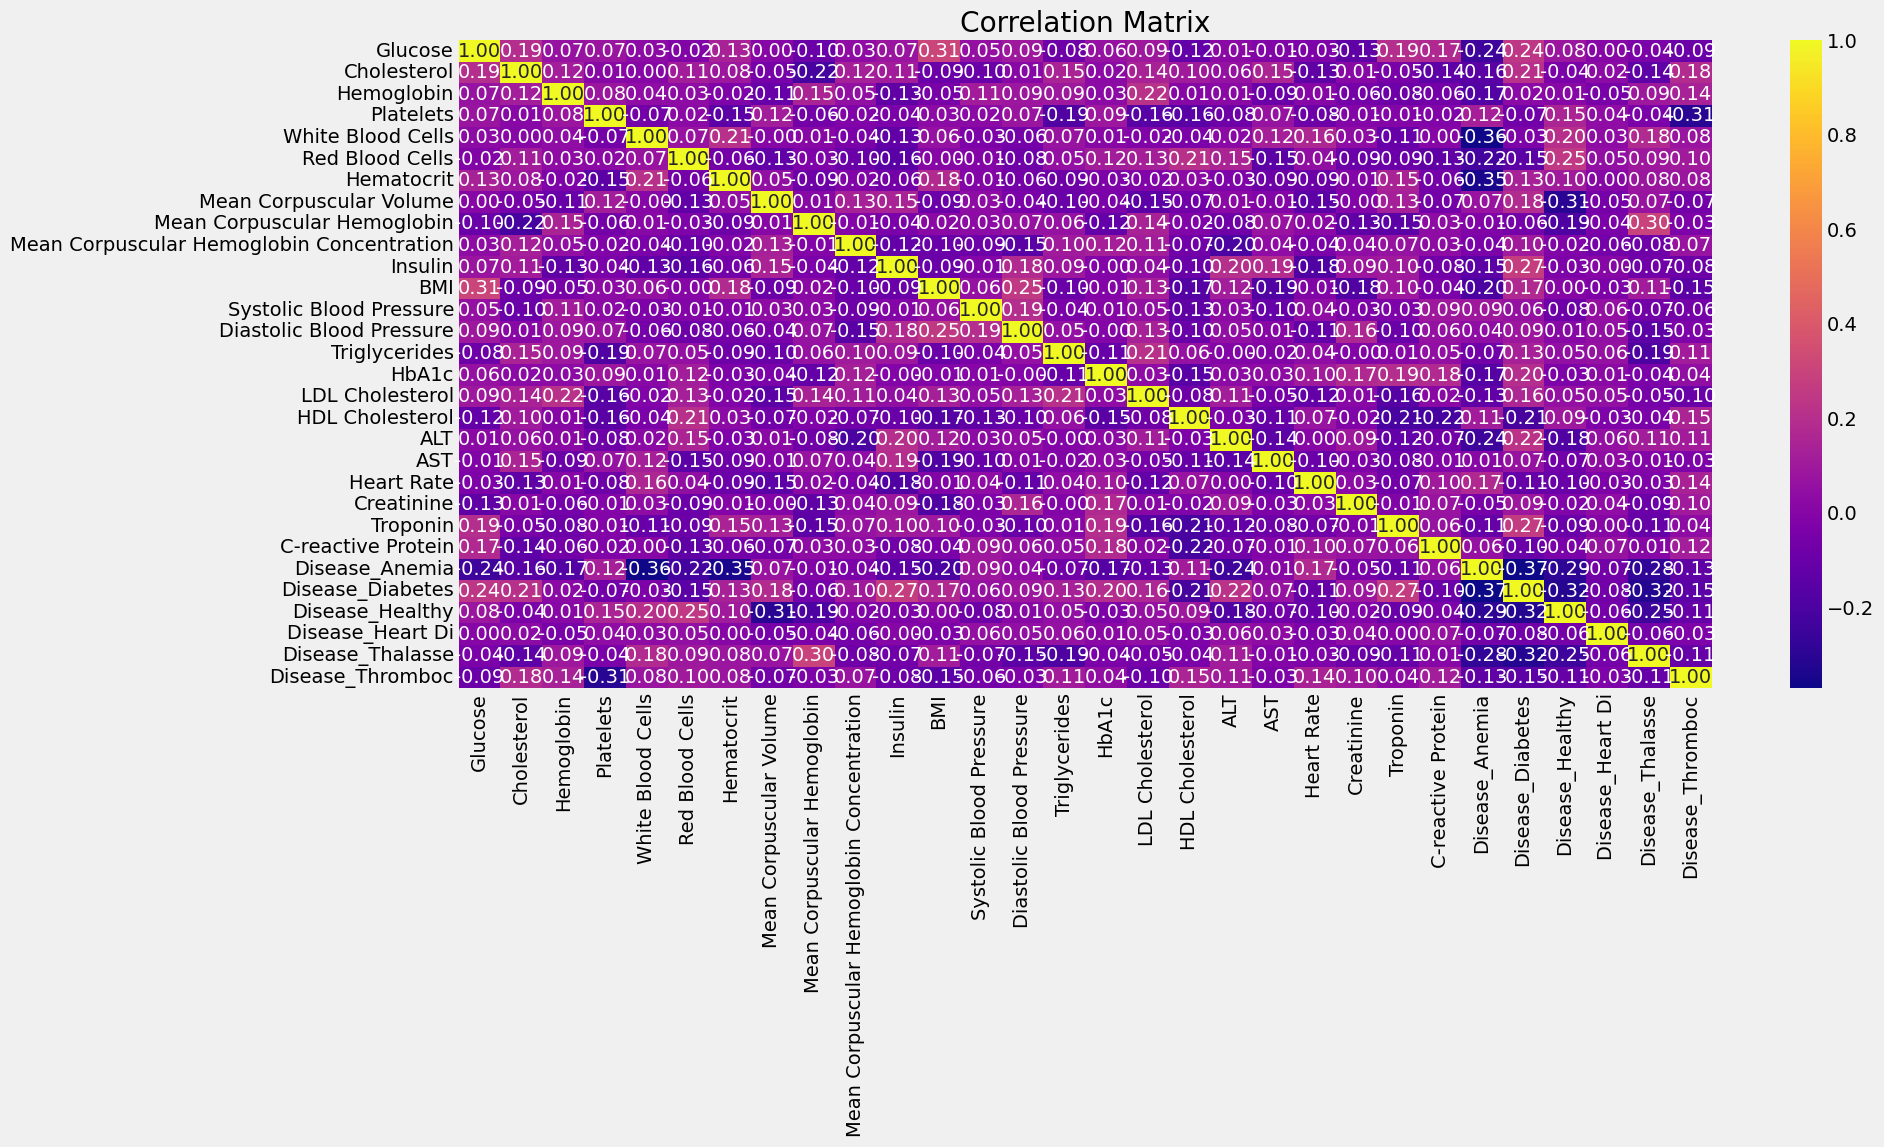

In [11]:
corr_matrix = df_encoded.corr()
plt.figure(figsize=(18, 8))
sns.heatmap(data = corr_matrix, annot=True, cmap='plasma', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Creating the model**

In [14]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

In [15]:
optimizer = Adam(learning_rate=0.001)  # MY Alpha
model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [16]:
early_stopping = EarlyStopping(patience=3, restore_best_weights=True)

In [17]:
label_encoder = LabelEncoder()

# Here we will encode the target variable
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [18]:
history = model.fit(X_train_scaled, y_train_encoded, epochs=20, batch_size=32, 
                    validation_split=0.1, callbacks=[early_stopping], verbose=1)

Epoch 1/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3014 - loss: -1.0060 - val_accuracy: 0.2863 - val_loss: -6.9994
Epoch 2/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2978 - loss: -10.7923 - val_accuracy: 0.2863 - val_loss: -34.7983
Epoch 3/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3106 - loss: -45.4092 - val_accuracy: 0.2863 - val_loss: -123.8620
Epoch 4/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 992us/step - accuracy: 0.3039 - loss: -148.2361 - val_accuracy: 0.2863 - val_loss: -326.0074
Epoch 5/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3167 - loss: -356.9469 - val_accuracy: 0.2996 - val_loss: -692.7704
Epoch 6/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3649 - loss: -733.8124 - val_accuracy: 0.3348 - val_loss: -1268.5948
Epoch 7/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3491 - loss: -1280.5972 - val_accuracy: 0.3524 - val_loss: -2083.5979
Epoch 8/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3621 - loss: -

In [19]:
loss, accuracy = model.evaluate(X_test_scaled, y_test_encoded, verbose=0)
print(f'Test Loss: {loss:.3f}, Test Accuracy: {accuracy*100:.2f}%')

Test Loss: -40715.926, Test Accuracy: 39.08%


In [20]:
model1 = LogisticRegression(random_state=42)
model2 = SVC()
model3 = RandomForestClassifier(random_state=42)
model4 = GradientBoostingClassifier(n_estimators=1000)
model5 = DecisionTreeClassifier()

In [21]:
columns = ["LogisticRegression", "SVC", "RandomForestClassifier", "GradientBoostingClassifier", "DecisionTreeClassifier"]

all_results = {
    "result1": [],
    "result2": [],
    "result3": [],
    "result4": []
}      

In [22]:
def Calculate(model, average='macro'):
    model.fit(X_train_scaled, y_train)
    predicted = model.predict(X_test_scaled)

    accuracy = accuracy_score(y_test, predicted)
    Precision = precision_score(y_test, predicted, average=average)
    recall = recall_score(y_test, predicted, average=average)
    f1 = f1_score(y_test, predicted, average=average)
    all_results["result1"].append(accuracy)
    all_results["result2"].append(Precision)
    all_results["result3"].append(recall)
    all_results["result4"].append(f1)

    sns.heatmap(confusion_matrix(y_test, predicted), annot=True)
    print(model)
    print("Accuracy is: ", accuracy , " - Precision is: ", Precision, " - recall is: ", recall, " - F1 is: ", f1 )

LogisticRegression(random_state=42)
Accuracy is:  0.8591549295774648  - Precision is:  0.722637928280911  - recall is:  0.7252825052791502  - F1 is:  0.7231074751206746


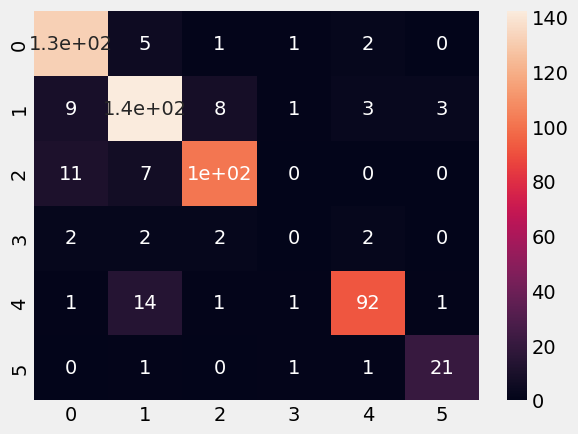

In [23]:
Calculate(model1)

SVC()
Accuracy is:  0.9454225352112676  - Precision is:  0.8033598255085771  - recall is:  0.7809660304661586  - F1 is:  0.7901139512485416


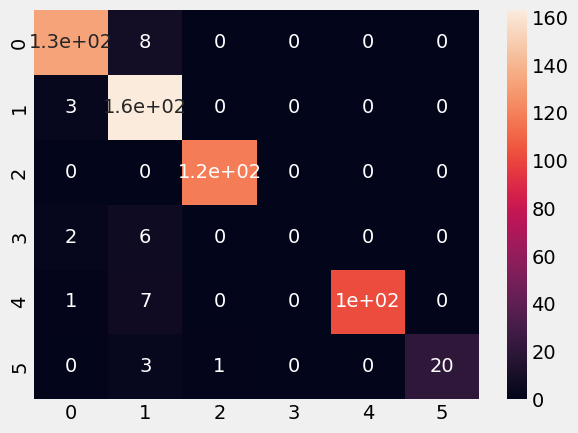

In [24]:
Calculate(model2)

RandomForestClassifier(random_state=42)
Accuracy is:  0.9577464788732394  - Precision is:  0.9789473684210526  - recall is:  0.8096899849559424  - F1 is:  0.8354019749150835


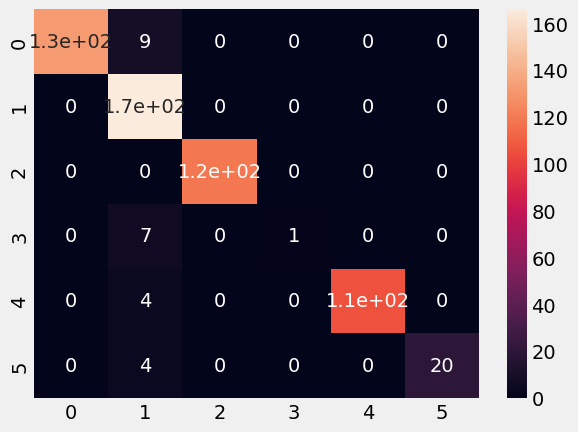

In [25]:
Calculate(model3)


In [26]:
Calculate(model4)

KeyboardInterrupt: 

DecisionTreeClassifier()
Accuracy is:  0.9330985915492958  - Precision is:  0.8382924737291794  - recall is:  0.82718883270024  - F1 is:  0.8296007361731742


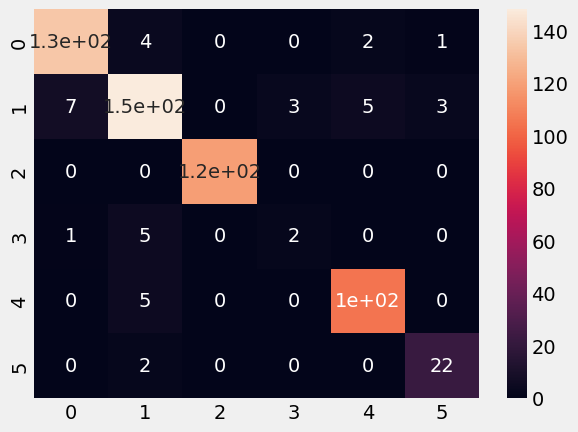

In [ ]:
Calculate(model5)

In [ ]:
# Ensure all lists have the same length (using -1 for missing values)
num_models = len(columns)
all_accuracies = all_results["result1"] + [-1] * (num_models - len("result1"))
all_precisions = all_results["result2"] + [-1] * (num_models - len("result2"))
all_recalls = all_results["result3"] + [-1] * (num_models - len("result3"))
all_f1s = all_results["result4"] + [-1] * (num_models - len("result4"))

# Handle potential missing values (using to_numeric with coerce)
all_accuracies = pd.to_numeric(all_accuracies, errors='coerce')
all_precisions = pd.to_numeric(all_precisions, errors='coerce')
all_recalls = pd.to_numeric(all_recalls, errors='coerce')
all_f1s = pd.to_numeric(all_f1s, errors='coerce')

# Create the DataFrame
FinalResults = pd.DataFrame({
    "Algorithm": columns,
    "Accuracies": all_accuracies,
    "Precisions": all_precisions,
    "Recalls": all_recalls,
    "F1'S": all_f1s
})

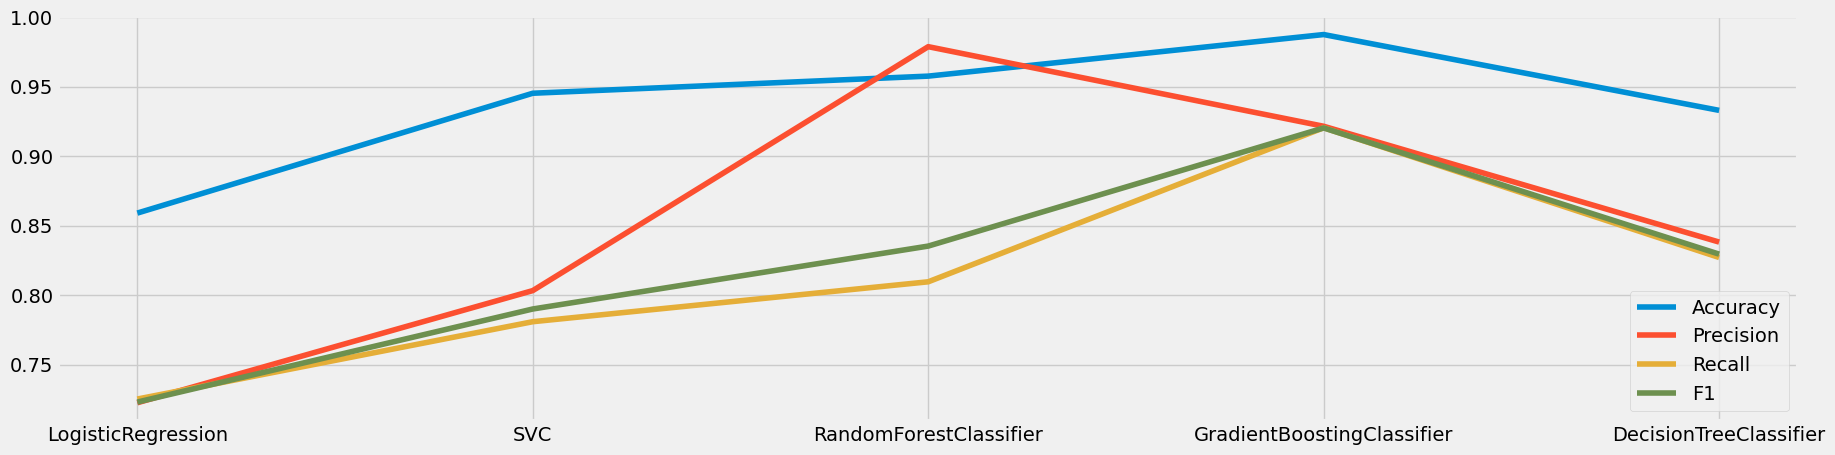

In [ ]:
fig,ax = plt.subplots(figsize=(20,5))

plt.plot(FinalResults.Algorithm, all_accuracies, label="Accuracy")
plt.plot(FinalResults.Algorithm, all_precisions, label="Precision")
plt.plot(FinalResults.Algorithm, all_recalls, label="Recall")
plt.plot(FinalResults.Algorithm, all_f1s, label="F1")
plt.legend(loc="lower right")

plt.show()